In [14]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import numpy as np 

In [15]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [16]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [17]:
import matplotlib.pyplot as plt 

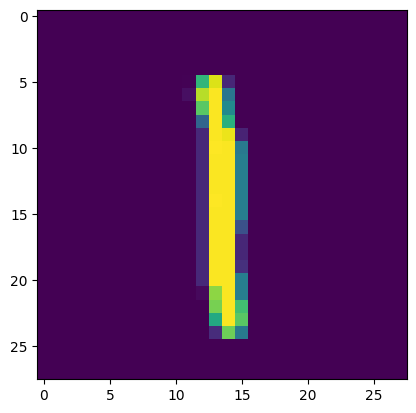

In [42]:
plt.imshow(x_train[14])
plt.show()

In [19]:
x_train=x_train/255
x_test=x_test/255

In [20]:
x_test.shape

(10000, 28, 28)

In [21]:
model=Sequential()

In [22]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation='softmax'))

C:\Users\Ashish Kumar Singh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8670 - loss: 0.4717 - val_accuracy: 0.9537 - val_loss: 0.1582
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9594 - loss: 0.1385 - val_accuracy: 0.9653 - val_loss: 0.1149
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9743 - loss: 0.0883 - val_accuracy: 0.9637 - val_loss: 0.1176
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9815 - loss: 0.0636 - val_accuracy: 0.9722 - val_loss: 0.0908
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9868 - loss: 0.0459 - val_accuracy: 0.9742 - val_loss: 0.0885
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9883 - loss: 0.0376 - val_accuracy: 0.9766 - val_loss: 0.0798
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9923 - loss: 0.0265 - val_accuracy: 0.9737 - val_loss: 0.0936
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0252 - 

In [26]:
y_prob=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
y_prob

array([[2.6589020e-09, 4.9270332e-12, 1.9700513e-08, ..., 9.9999917e-01,
        3.8322017e-09, 1.3990786e-09],
       [1.9084741e-13, 2.0361761e-06, 9.9999797e-01, ..., 5.1217815e-20,
        5.1317097e-15, 1.7033095e-20],
       [4.1504218e-09, 9.9991286e-01, 1.4462786e-05, ..., 5.7455381e-05,
        1.0950889e-05, 1.2992345e-10],
       ...,
       [9.1364448e-18, 2.9504195e-15, 4.2235210e-17, ..., 3.9386552e-09,
        3.9666035e-12, 3.5696800e-08],
       [1.3480304e-16, 4.4907296e-21, 2.2318583e-21, ..., 1.4963210e-19,
        3.6710517e-11, 7.9194834e-20],
       [4.9750341e-13, 3.1196293e-23, 4.8175641e-17, ..., 7.3641135e-18,
        2.1293565e-18, 2.3328820e-20]], dtype=float32)

In [28]:
y_pred=y_prob.argmax(axis=1)
y_pred.shape

(10000,)

In [29]:
y_test.shape

(10000,)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9773

In [35]:
model.predict(x_test[12].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([9], dtype=int64)

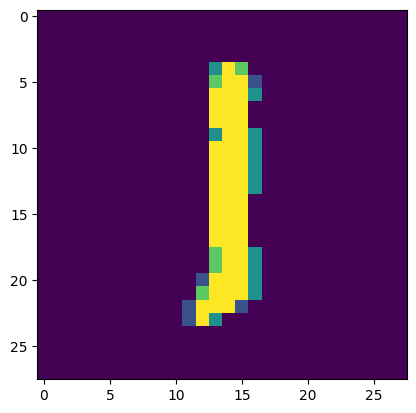

In [43]:
plt.imshow(x_test[14])
plt.show()

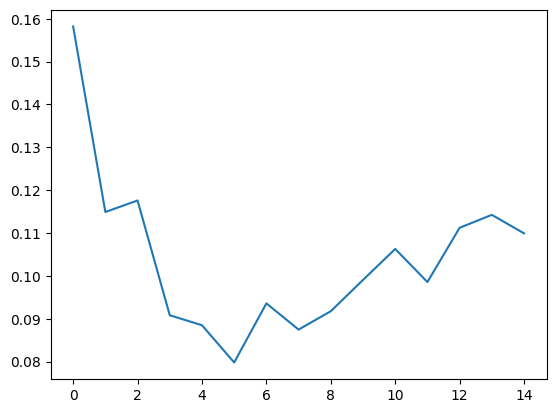

In [33]:
plt.plot(history.history['val_loss'])